# Chapter 7: Joint Distributions
 
This Jupyter notebook is the Python equivalent of the R code in section 7.7 R, pp. 318 - 320, [Introduction to Probability, 1st Edition](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578), Blitzstein & Hwang.

----

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Multinomial

The functions for the Multinomial distribution represented by [`scipy.stats.multinomial`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html) are `pmf` (which is the joint PMF of the Multinomial distribution) and `rvs` (which generates realizations of Multinomial random vectors). The joint CDF of the Multinomial is a pain to work with, so like R it is not built in `multinomial`.

To use `pmf`, we have to input the value at which to evaluate the joint PMF, as well as the parameters of the distribution. For example,

In [2]:
from scipy.stats import multinomial

# to learn more about scipy.stats.multinomial, un-comment out the following line
#print(multinomial.__doc__)

In [3]:
x = [2, 0, 3]
n = 5
p = [1/3, 1/3, 1/3]

ans = multinomial.pmf(x, n, p)
print('multinomial.pmf(x, n, p) = {}'.format(ans))

multinomial.pmf(x, n, p) = 0.041152263374485576


returns the probability $P(X_1 = 2, \, X_2 = 0, \, X_3 = 3)$, where

\begin{align}
  X = (X_1, \, X_2, \, X_3) \sim Mult_3\left(5, \, (\frac{1}{3}, \frac{1}{3}, \frac{1}{3})\right)
\end{align}

Of course, `n` has to equal `numpy.sum(x)`; if we attempted to do `multinomial.pmf(x, 7, p)`, the return value would simply be 0.0.

For `rvs`, the named function parameter `size` is the number of Multinomial random vectors to generate, and the other inputs are the same. When we ran `rvs(n, p, size=10)` with `n` and `p` as above, `multinomial` gave us the following matrix:

In [4]:
# seed the random number generator
np.random.seed(1234)

rv_vector = multinomial.rvs(n, p, size=10)

print('matrix of Multinomial random vectors has shape {}\n'.format(rv_vector.shape))

print(rv_vector)

matrix of Multinomial random vectors has shape (10, 3)

[[1 2 2]
 [1 3 1]
 [2 1 2]
 [1 3 1]
 [4 1 0]
 [1 2 2]
 [2 2 1]
 [1 2 2]
 [2 0 3]
 [2 3 0]]


Each row of the matrix corresponds to a draw from the $Mult_3\left(5, \, (1/3, 1/3, 1/3)\right)$ distribution. In particular, the sum of each row is 5.

## Multivariate Normal

Functions for the Multivariate Normal distribution are located in the [`scipy.stats.multivariate_normal`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html) module. As expected, `pdf` can be used for calculating the joint PDF, and `rvs` can be used for generating random vectors. For example, suppose that we want to generate 1000 independent Bivariate Normal pairs $(Z, W)$, with correlation $\rho = 0.7$ and $N(0, 1)$ marginals. To do this, we can execute the following:

In [5]:
from scipy.stats import multivariate_normal

# to learn more about scipy.stats.multivariate_normal, un-comment out the following line
#print(multivariate_normal.__doc__)

In [6]:
np.random.seed(4321)

meanvector = [0, 0]
rho = 0.7
covmatrix = np.matrix([[1, rho],
                       [rho, 1]])

r = multivariate_normal.rvs(mean=meanvector, cov=covmatrix, size=10**3)
print('matrix r has shape: {}'.format(r.shape))

# take the 1st column of matrix r as Z
Z = r[:, 0]

# take the 2nd column of matrix r as W
W = r[:, 1]

matrix r has shape: (1000, 2)


The covariance matrix here is

\begin{align}
  \begin{pmatrix}
    1 & \rho \\
    \rho & 1
  \end{pmatrix}
\end{align}

because

* $Cov(Z, Z) = Var(Z) = 1$ (this is the upper left entry)
* $Cov(W, W) = Var(W) = 1$ (this is the lower right entry)
* $Cov(Z, W) = Corr(Z, W) \, SD(Z) \, SD(W) = \rho$ (this is the other two entries).

Now `r` is a 1000 $\times$ 2 matrix, with each row a BVN random vector. To see these as points in the plane, we can use [`matplotlib.pyplot.scatter(Z, W)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to make a scatter plot, from which the strong positive correlation should be clear. To estimate the covariance of `Z` and `W`, we can use [`numpy.cov(Z, W)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html), which computes the true covariance matrix.

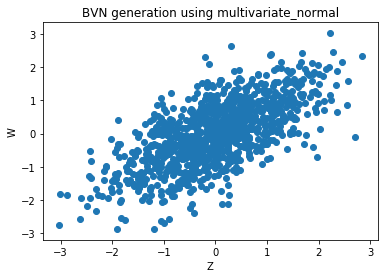

In [7]:
plt.scatter(Z, W)

plt.xlabel('Z')
plt.ylabel('W')
plt.title('BVN generation using multivariate_normal')

plt.show()

In [8]:
est_cov = np.cov(Z, W)
print('estimated covariance of Z and W:\n{}'.format(est_cov))

estimated covariance of Z and W:
[[ 0.99657514  0.65663763]
 [ 0.65663763  0.95921587]]


Example 7.5.10 gives another approach to the BVN generation problem:

In [9]:
np.random.seed(2345)

from scipy.stats import norm

rho = 0.7
tau = np.sqrt(1 - rho**2)
x = norm.rvs(size=10**3)
y = norm.rvs(size=10**3)
z = x
w = rho*x + tau*y

This gives the Z-coordinates in an array `z` and the W-coordinates in an array `w`. If we want to put them into one 1000 $\times$ 2 matrix as we had above, we can use [`numpy.stack([z, w], axis=1)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html) to bind the arrays together as columns.

In [10]:
# bind z and w into a 1000 x 2 matrix
r2 = np.stack([z, w], axis=1)
print('matrix r2 has shape: {}'.format(r2.shape))

matrix r2 has shape: (1000, 2)


Let's create another scatter plot now with `z` and `w`, and also check their estimated covariance.

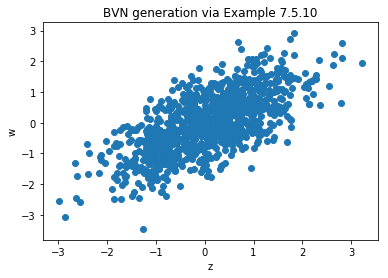

In [11]:
plt.scatter(z, w)

plt.xlabel('z')
plt.ylabel('w')
plt.title('BVN generation via Example 7.5.10')

plt.show()

In [12]:
est_cov2 = np.cov(z, w)
print('estimated covariance of z and w:\n{}'.format(est_cov2))

estimated covariance of z and w:
[[ 0.95549996  0.66196029]
 [ 0.66196029  0.95955495]]


## Cauchy

We can work with the Cauchy distribution introduced in Example 7.1.24 using the three functions `pdf`, `cdf`, and `rvs` in [`scipy.stats.cauchy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html). To shift and/or scale the distribution use the `loc` and `scale` parameters. Specifically, `cauchy.pdf(x, loc, scale)` is identically equivalent to `cauchy.pdf(y) / scale` with `y = (x - loc) / scale`.

In [13]:
from scipy.stats import cauchy

# to learn more about scipy.stats.cauchy, un-comment out the following line
#print(cauchy.__doc__)

For an amusing demonstration of the very heavy tails of the Cauchy distribution, try creating a histogram of 1000 simulated values of the Cauchy distribution:

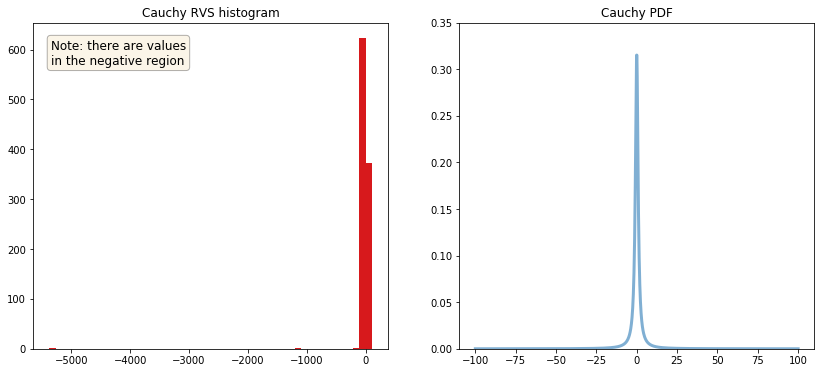

In [14]:
np.random.seed(222)

fig = plt.figure(figsize=(14, 6))

# create frozen instance of a cauchy distribution
cauch = cauchy()

# generate 1000 random simulated values from cauchy
rv = cauch.rvs(size=1000)

ax1 = fig.add_subplot(121)
ax1.hist(rv, bins=50, color='#d7191c')
ax1.set_title('Cauchy RVS histogram')
txt = 'Note: there are values\nin the negative region'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax1.text(0.05, 0.95, txt, transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# create a sequqnce of 1000 values from -100 to 100 for x
x = np.linspace(-100, 100, 1000)
# obtain corresponding cauchy PDF values for y
y = cauch.pdf(x)

ax2 = fig.add_subplot(122)
ax2.plot(x, y, lw=3, alpha=0.6, color='#2c7bb6', label='cauchy pdf')
ax2.set_ylim([0.0, 0.35])
ax2.set_title('Cauchy PDF')

plt.show()

Due to extreme values in the tails of the distribution, this histogram looks nothing like the PDF of the distribution from which it was generated.

----

&copy; Blitzstein, Joseph K.; Hwang, Jessica. Introduction to Probability (Chapman & Hall/CRC Texts in Statistical Science).